In [1]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1.

In [3]:
def generate_dataset(size):
    dataset = np.zeros((size, size), dtype=int)
    for x in range(size):
        y_start = x
        y_end = min(y_start + (size // 2), size)  # Ensure not to exceed row size
        dataset[x, y_start:y_end] = 1
    return pd.DataFrame(dataset)

In [8]:
datasets = {
    '4': generate_dataset(4),
    '16': generate_dataset(16),
    '256': generate_dataset(256),
}
datasets['4']

,0,1,2,3
0,1,1,0,0
1,0,1,1,0
2,0,0,1,1
3,0,0,0,1


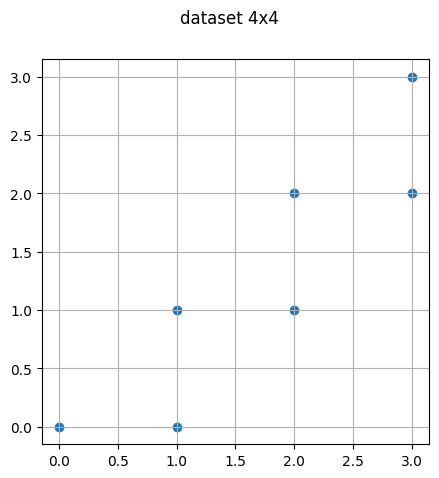

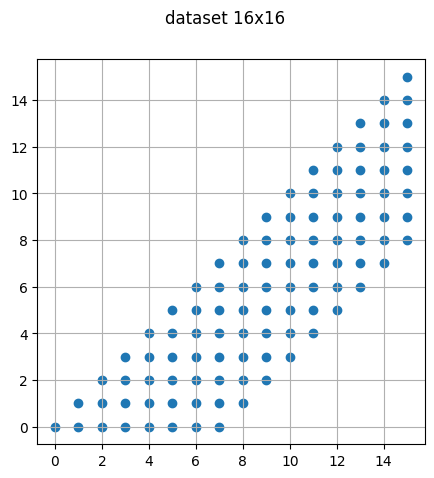

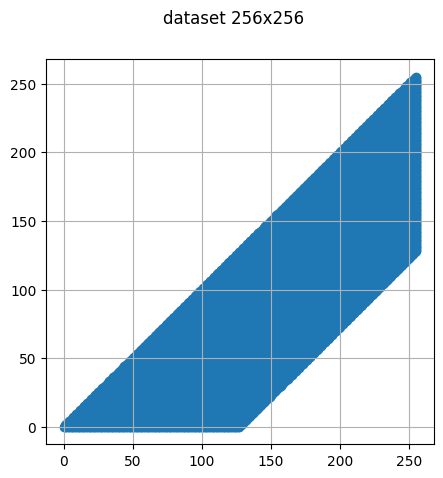

In [42]:
for name, dataset in datasets.items():
    plt.figure(figsize=(5, 5))
    plt.suptitle(f'dataset {name}x{name}')

    #plt.subplot(1, 2, 1)
    x, y = np.where(dataset.values == 1)
    plt.scatter(y, x)
    plt.grid()

    #plt.subplot(1, 2, 2)
    #plt.imshow(dataset, cmap='binary', origin='lower', extent=[0, int(name), 0, int(name)])

    plt.show()

# 2.

In [ ]:
def task_2(dataset, a=6, c=200):
    dataset_scaler = StandardScaler()
    dataset_scaler.fit(dataset)
    dataset_scaled = dataset_scaler.transform(dataset)
    
    pca = PCA()
    pca.fit(dataset_scaled)

    # a) Scree plot
    explaned_variance_ratio = pca.explained_variance_ratio_
    plt.figure(figsize=(25, 5))
    plt.suptitle(f'dataset {len(dataset)}x{len(dataset)}')

    plt.subplot(1, 5, 1)
    plt.title('a) scree plot')
    plt.plot(np.arange(1, len(explaned_variance_ratio) + 1), explaned_variance_ratio)
    plt.scatter(np.arange(1, len(explaned_variance_ratio) + 1), explaned_variance_ratio, color='red', s=10, alpha=0.6)
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance ratio')

    # b) 
    plt.subplot(1, 5, 2)
    if len(explaned_variance_ratio) < a:
        print(f'dataset {len(dataset)}x{len(dataset)}: a > количество переменных  =>  a = кол-во переменных')
    a = min(len(explaned_variance_ratio), a)
    pca = PCA(n_components=a)
    pca.fit(dataset_scaled)
    pca_result = pca.transform(dataset)


    print(pca_result)
    #print(pca_result[:, 0])
    #print(pca_result[:, 1])
    #plt.title('b)')
    #plt.scatter(pca_result[:, 0], pca_result[:, 1], color='red', s=10)
    #plt.xlabel('First Principal Component')
    #plt.ylabel('Second Principal Component')
    #plt.grid(True)

    # c)
    plt.subplot(1, 5, 3)

    # d)
    plt.subplot(1, 5, 4)

    # e)
    plt.subplot(1, 5, 5)


    plt.show()
    
    return pca

dataset 4x4: a > количество переменных  =>  a = кол-во переменных
[[ 1.03598650e+00 -4.68332204e-01  1.41056448e-01  1.11022302e-16]
 [ 4.32865769e-01  7.69963922e-01 -1.79674107e-01 -1.11022302e-16]
 [-8.15812280e-01  2.76968254e-01  2.65026244e-01 -1.11022302e-16]
 [-6.53039987e-01 -5.78599972e-01 -2.26408585e-01  1.11022302e-16]]


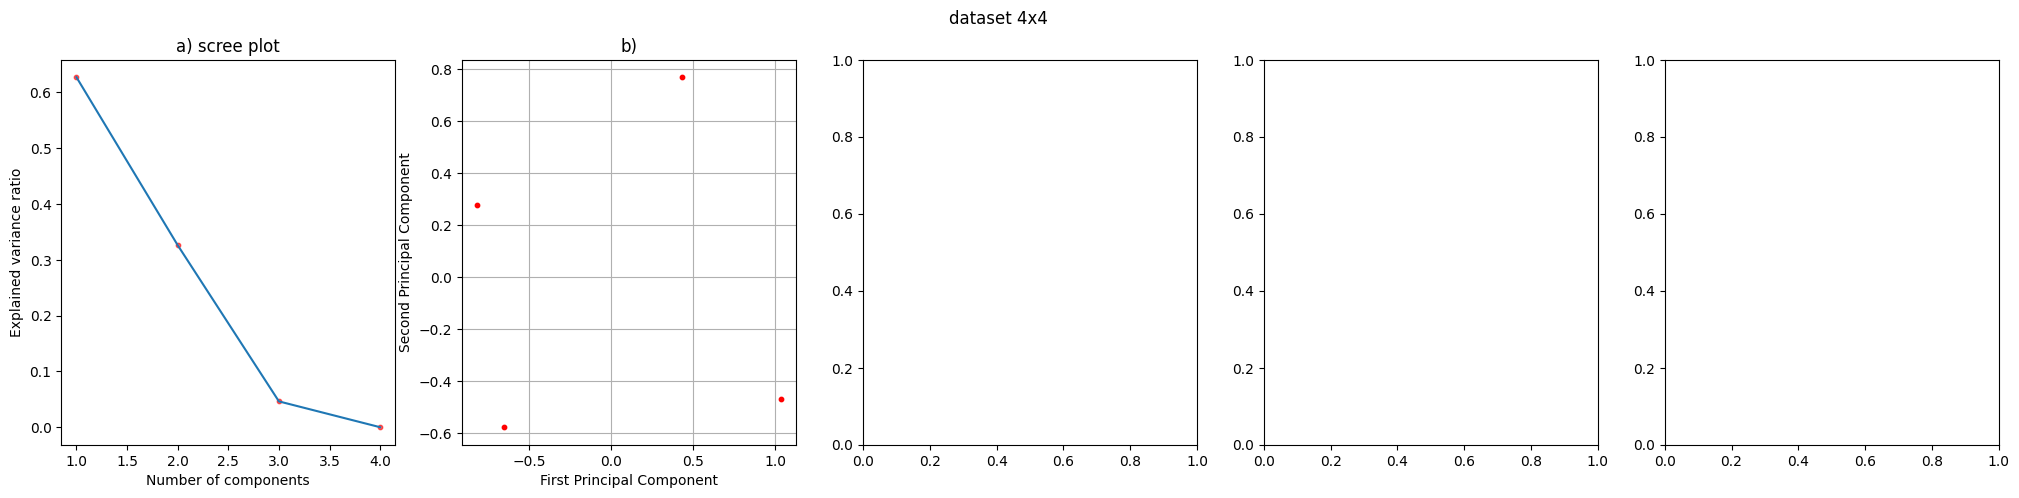

[[ 1.82450214e+00 -1.29388956e+00  8.82847633e-01 -4.42418705e-01
   3.32838788e-01  3.16227766e-01]
 [ 1.98175912e+00 -8.63035865e-01  5.39133829e-01  1.52538833e-01
  -1.87187245e-01 -3.16227766e-01]
 [ 1.95022013e+00 -2.77372483e-01 -8.29043992e-02  6.37108628e-01
  -1.44399162e-01 -3.16227766e-01]
 [ 1.72848271e+00  3.54866151e-01 -5.61360383e-01  3.93982962e-01
   3.29259514e-01  3.16227766e-01]
 [ 1.33285498e+00  9.17315238e-01 -5.92390131e-01 -3.11383068e-01
   3.69111979e-01  1.66533454e-16]
 [ 7.95904993e-01  1.30606656e+00 -2.14514567e-01 -6.50442567e-01
  -2.19806486e-01 -3.16227766e-01]
 [ 1.63504950e-01  1.44806117e+00  2.27544602e-01 -2.41058390e-01
  -6.21766691e-01  3.16227766e-01]
 [-5.09357241e-01  1.31405173e+00  3.51245548e-01  3.89914295e-01
  -2.80850505e-01  3.16227766e-01]
 [-1.16361281e+00  9.23853093e-01  3.21362305e-02  4.57135922e-01
   2.33428865e-01 -3.16227766e-01]
 [-1.38526919e+00  5.79865022e-01  1.19551079e-01  6.94033632e-02
   5.51027982e-01 -3.8857

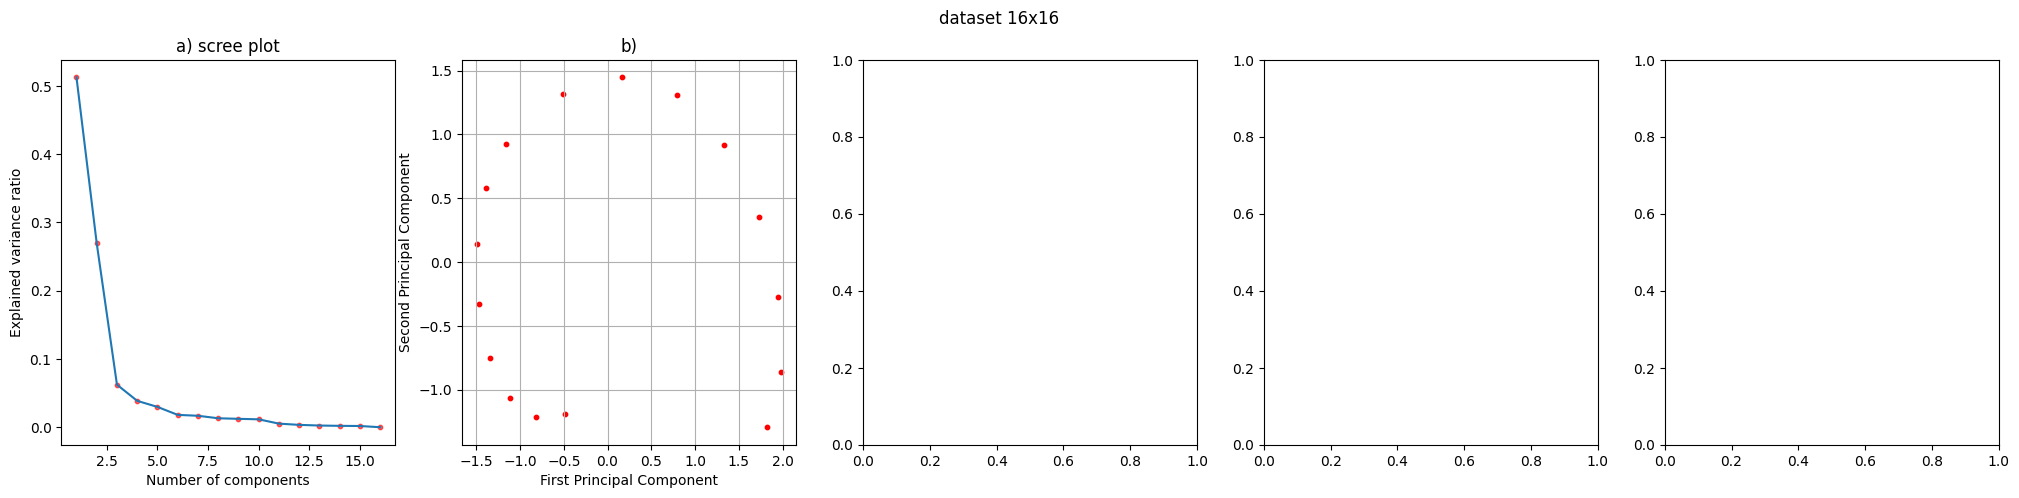

[[ 6.79939941 -5.42365742  3.38018457 -1.95842705  1.93404196 -1.33978051]
 [ 6.87819328 -5.365418    3.41015503 -1.96107262  1.85202357 -1.39619256]
 [ 6.95437849 -5.30316703  3.43256922 -1.95173657  1.76040683 -1.43465111]
 ...
 [-1.05573779 -4.45123646 -3.26077634 -1.87165809 -1.21438906 -0.65591246]
 [-0.97354288 -4.40174311 -3.23295237 -1.90178869 -1.29246936 -0.74040626]
 [-0.89174356 -4.34988474 -3.20027222 -1.9242201  -1.36769416 -0.81999208]]


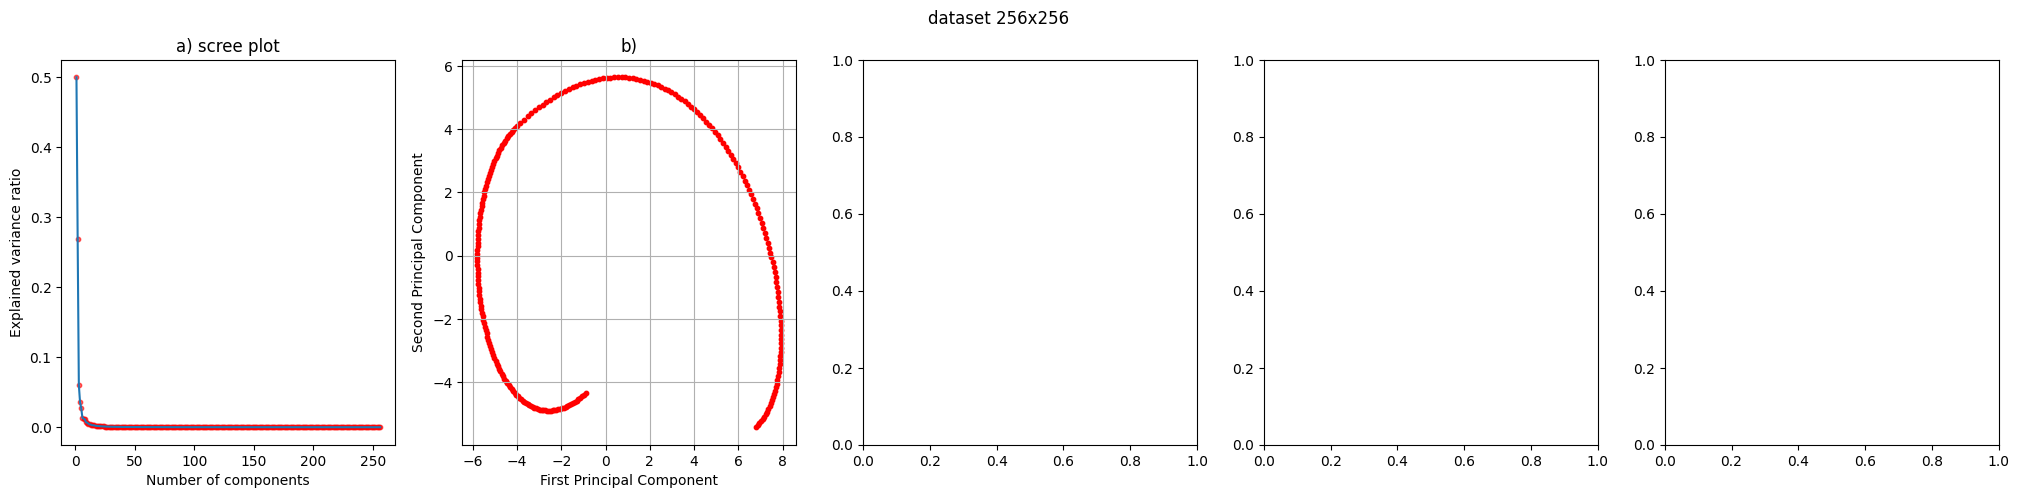

In [115]:
for name, dataset in datasets.items():
    task_2(dataset, a = 6)